### Hypothesis Testing 📊

Hypothesis testing is a fundamental concept in statistics used to make decisions about a population based on sample data. It starts with defining two competing statements:  

- **Null Hypothesis (H₀) ❌:** Assumes no effect, difference, or change. It represents the default or status quo.  
- **Alternative Hypothesis (H₁ or Ha) ✅:** Suggests there is an effect, difference, or change. It represents what we aim to prove.  

The purpose of hypothesis testing is to determine whether the evidence from the data is strong enough to **reject the null hypothesis** in favor of the alternative hypothesis. This involves calculating a test statistic and comparing it with a critical value or using a p-value to make an informed decision.  

Hypothesis testing is widely used in experiments, research studies, and data analysis to draw meaningful conclusions from data. 🔍
![Hypothesis Testing](./img/image-8.png)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("SOCR-HeightWeight.csv")

In [4]:
data.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [ ]:
pop = data['Weight(Pounds)']
print(pop.mean())
print(pop.std())
# We have 25,000 rows of weight data which we are considering as the population (mean = 127.07, std = 11.66)

127.07942116080001
11.660897563604287


In [ ]:
# From the population (mean = 127, std = 11)
# we took a sample of 100 data points having a sample mean of 128.
sample = pop.sample(100)
sample.mean()

128.222068

### Step 3: Performing Hypothesis Testing 🧮

Now, we will perform **hypothesis testing** using the **Z-test**.  
Here, we are testing whether the sample mean significantly differs from the population mean.

- **Null Hypothesis (H₀):** The population mean is **127**.  
  _(There is no significant difference between sample and population mean.)_  
- **Alternative Hypothesis (H₁):** The population mean is **not 127** — it may be **greater or smaller** than 127.  

Since we are using the **population standard deviation (σ = 11)** and **population mean (μ = 127)**, the **Z-test** is appropriate for this scenario.  

We will use:
- Population mean (μ) = 127.07  
- Population standard deviation (σ) = 11.66  
- Sample size (n) = 100  
- Sample mean (x̄) = 128  

Our goal 🎯 is to check whether the difference between the sample mean and population mean is statistically significant or just due to random variation.


### Step 4: Defining the Significance Level and Critical Region 🎯

In hypothesis testing, we choose a **significance level (α)**, which tells us how much risk we are willing to take of rejecting a true null hypothesis.

Here, we take  
**α = 0.05 (5%)**

👉 This means we are allowing a **5% chance of error** — that is, we might reject H₀ even if it is actually true.

---

#### Critical Region vs Acceptance Region 📊

- The **Acceptance Region** is the range of values where we **do not reject H₀**.  
- The **Critical Region (Rejection Region)** is the range of values where we **reject H₀**, meaning our sample result is too unlikely under the null hypothesis.

Since our test is **two-tailed** (because H₁ says the mean is *not equal* to 127),  
the 5% significance level is divided into two tails:  

- 2.5% in the **left tail**  
- 2.5% in the **right tail**

---

For α = 0.05 in a **two-tailed Z-test**,  
the **critical Z-values** are approximately **±1.96**.

So we will:
- **Reject H₀** if |Z| > 1.96  
- **Fail to reject H₀** if |Z| ≤ 1.96  

This helps us decide whether the sample mean (128) is statistically different from the population mean (127). 🧠


In [20]:
from scipy.stats import norm
def Z_test(sample_mean, pop_mean, alpha, pop_std, sample_size):
    # Two-tailed test → split alpha into two tails
    alpha_half = alpha / 2
    # Left critical value
    z_left = norm.ppf(alpha_half)
    # Right critical value
    z_right = norm.ppf(1 - alpha_half)
    
    
    Z = (sample_mean - pop_mean) / (pop_std / np.sqrt(sample_size))
    if Z > z_right or Z < z_left:
        print("H1 Wins")
    else:
        print("H0 wins")
    return Z



    
Z_test(sample.mean(), pop.mean(), 0.05, pop.std(), len(sample))

H0 wins


0.9798961297511088

In [21]:
print(0.9798961297511088 < 1.959963984540054)

True


H0 wins


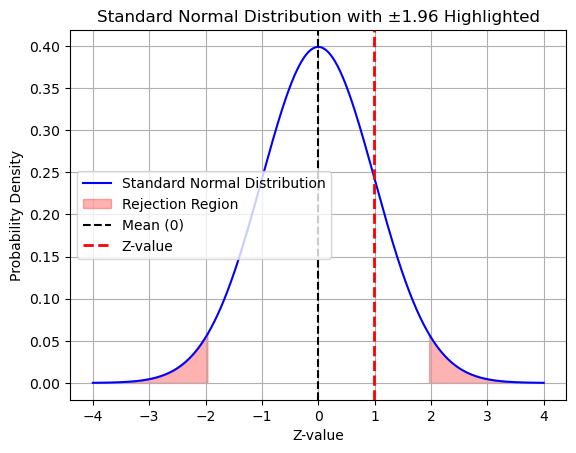

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Standard normal distribution
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # mean=0, std=1

# Critical Z-values
z_left, z_right = -1.96, 1.96

# Plot the curve
plt.plot(x, y, label='Standard Normal Distribution', color='blue')

# Highlight critical region
plt.fill_between(x, 0, y, where=(x <= z_left), color='red', alpha=0.3, label='Rejection Region')
plt.fill_between(x, 0, y, where=(x >= z_right), color='red', alpha=0.3)

# Labels
plt.axvline(0, color='black', linestyle='--', label='Mean (0)')
plt.axvline(Z_test(sample.mean(), pop.mean(), 0.05, pop.std(), len(sample)), linestyle='--', color='red', linewidth=2, label='Z-value')
plt.title('Standard Normal Distribution with ±1.96 Highlighted')
plt.xlabel('Z-value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()
